## Iris Dataset Classification using K-Nearest Neighbors with Dimension Reduction

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

## 3D K-Nearest Neighbor

In [4]:
iris = load_iris()

pca = PCA(n_components=3)
features = pca.fit(iris.data).transform(iris.data)

feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

print(features.shape)

(150, 3)


train size :  120  / test size :  30

Training set score: 1.000000
Test set score: 0.766667
Training Time : 0.0168 sec


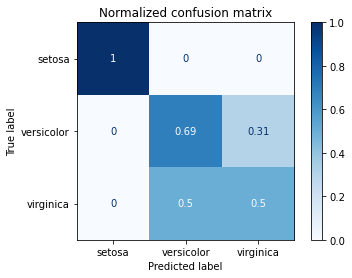

In [5]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

start = time.perf_counter()

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=iris.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

## 2D K-Nearest Neighbor

In [6]:
pca = PCA(n_components=2)
features = pca.fit(iris.data).transform(iris.data)

feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

print(features.shape)

(150, 2)


train size :  120  / test size :  30

Training set score: 1.000000
Test set score: 0.933333
Training Time : 0.0138 sec


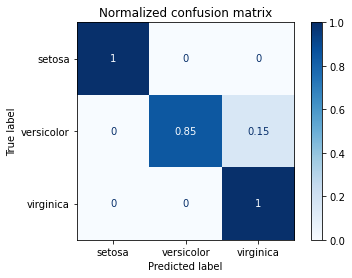

In [7]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

start = time.perf_counter()

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=iris.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

## Nearest Centroid Classifier

train size :  120  / test size :  30

Training set score: 0.941667
Test set score: 0.900000
Training Time : 0.0003 sec


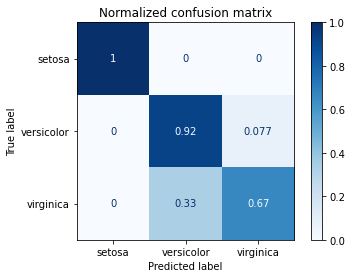

In [8]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

nc = NearestCentroid()
nc.fit(x_train, y_train)

train_score = nc.score(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

disp = ConfusionMatrixDisplay.from_estimator(nc, x_test, y_test, display_labels=iris.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()